In [17]:
import pandas as pd

labels_df = pd.read_csv("labels.csv")   # ⬅ no "data/" in front
labels_df


,image,x1,y1,x2,y2,x3,y3
0,img1.png,0.3,0.4,0.6,0.7,0.2,0.3
1,img2.png,0.2,0.5,0.7,0.8,0.1,0.2
2,img3.png,0.4,0.6,0.5,0.4,0.3,0.5


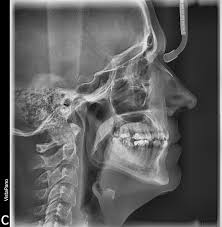

In [19]:
import os
from PIL import Image

img_folder = "images"

for idx, row in labels_df.iterrows():
    img_path = os.path.join(img_folder, row["image"])
    img = Image.open(img_path)
    display(img)
    break


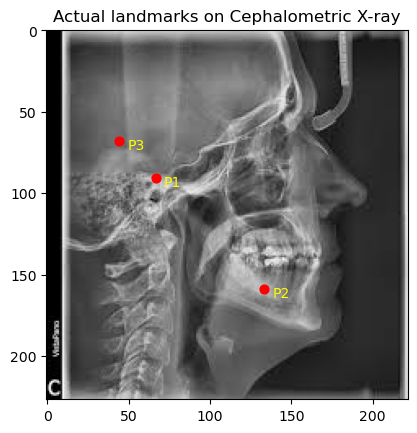

In [21]:
import matplotlib.pyplot as plt
from PIL import Image
import os

img_folder = "images"

# Get first row
row = labels_df.iloc[0]

# Load image
img_path = os.path.join(img_folder, row["image"])
img = Image.open(img_path)

# Convert to array for plotting
plt.imshow(img, cmap='gray')
plt.title("Actual landmarks on Cephalometric X-ray")

# Extract coordinates (already normalized)
x_points = [row["x1"], row["x2"], row["x3"]]
y_points = [row["y1"], row["y2"], row["y3"]]

# Convert normalized (0–1) coordinates to pixel positions
width, height = img.size
x_pixels = [x * width for x in x_points]
y_pixels = [y * height for y in y_points]

# Plot points
plt.scatter(x_pixels, y_pixels, c='red', s=40)

# Label each point
for i, (xp, yp) in enumerate(zip(x_pixels, y_pixels)):
    plt.text(xp+5, yp+5, f"P{i+1}", color='yellow')

plt.show()


In [25]:
import numpy as np

def extract_features(img_path):
    img = Image.open(img_path).convert("L")  # grayscale
    img = img.resize((64, 64))               # smaller size
    arr = np.array(img).flatten() / 255.0    # normalize
    return arr

features = []
targets = []

img_folder = "images"

for idx, row in labels_df.iterrows():
    img_path = os.path.join(img_folder, row["image"])
    feat = extract_features(img_path)
    features.append(feat)
    targets.append([row["x1"], row["y1"], row["x2"], row["y2"], row["x3"], row["y3"]])

X = np.array(features)
y = np.array(targets)

X.shape, y.shape


((3, 4096), (3, 6))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)

# Show predictions vs actual
print("Predicted:", pred)
print("Actual:", y_test)

# Evaluation
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)


Predicted: [[0.25894319 0.52478709 0.6375402  0.67010717 0.15894319 0.29441801]]
Actual: [[0.3 0.4 0.6 0.7 0.2 0.3]]
Mean Squared Error: 0.003546191576613289


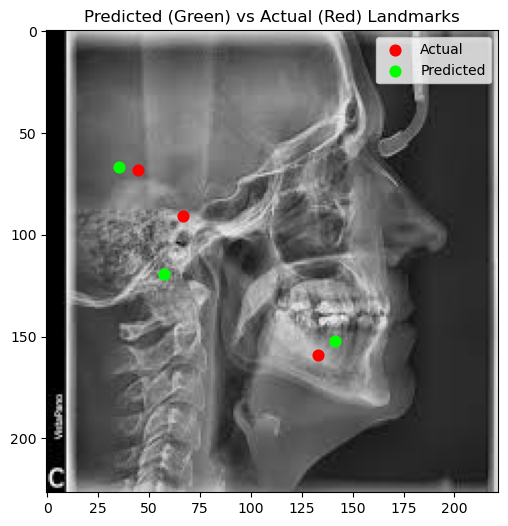

In [29]:
import matplotlib.pyplot as plt

# Pick the first test sample
test_idx = 0

actual = y_test[test_idx]
predicted = pred[test_idx]

# Load the corresponding image
test_image_name = labels_df.iloc[test_idx]["image"]
test_image_path = os.path.join(img_folder, test_image_name)

img = Image.open(test_image_path)
width, height = img.size

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Predicted (Green) vs Actual (Red) Landmarks")

# Actual coordinates
ax = [actual[0]*width, actual[2]*width, actual[4]*width]
ay = [actual[1]*height, actual[3]*height, actual[5]*height]
plt.scatter(ax, ay, c='red', s=60, label="Actual")

# Predicted coordinates
px = [predicted[0]*width, predicted[2]*width, predicted[4]*width]
py = [predicted[1]*height, predicted[3]*height, predicted[5]*height]
plt.scatter(px, py, c='lime', s=60, label="Predicted")

plt.legend()
plt.show()
